# 自行车租赁回归分析（练习）

+ 参考资料：https://blog.csdn.net/Caesar1993_Wang/article/details/80310491?utm_source=blogxgwz22

In [77]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('../input/train.csv', parse_dates=[0])
test_data = pd.read_csv('../input/test.csv', parse_dates=[0])




+ casual - number of non-registered user rentals initiated，未注册用户租借数量
+ registered - number of registered user rentals initiated，注册用户租借数量
+ count - number of total rentals：总租借数量

In [78]:
train_data.head()
# test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [79]:
# 没有缺失值
# train_data.info() # 10886 条数据均无缺失值
# test_data.info() # 6493 条数据均无缺失值

In [80]:
train_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [81]:
# 合并训练数据集与测试数据集，以便一起做特征处理，
# 比赛题目可以这么做，真实项目是没有测试数据集的
data_all = train_data.append(test_data, sort=False)
data_all.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [82]:
data_all['year'] = data_all.datetime.map(lambda x: x.year)
data_all['month'] = data_all.datetime.map(lambda x: x.month)
data_all['day'] = data_all.datetime.map(lambda x: x.day)
data_all['hour'] = data_all.datetime.map(lambda x: x.hour)
data_all['date'] = data_all.datetime.map(lambda x: x.date())
data_all['weekday'] = data_all['datetime'].dt.weekday

In [83]:
# 还可以从 dt 属性中提取字段
# data_all.datetime.dt.year
# data_all.datetime.dt.weekday_name

In [84]:
# 把原始的 datetime 字段去掉
data_all.drop('datetime', axis=1, inplace=True)
data_all.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,date,weekday
0,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011,1,1,0,2011-01-01,5
1,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011,1,1,1,2011-01-01,5
2,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011,1,1,2,2011-01-01,5
3,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011,1,1,3,2011-01-01,5
4,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011,1,1,4,2011-01-01,5


In [85]:
# 按照如下顺序，重排特征列
cols = [
    'year', 'month', 'day', 'weekday', 'hour', 'season', 'holiday',
    'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
    'casual', 'registered', 'count'
]

data_all = data_all.reindex(columns=cols)
# data_all[cols] 这样写也行
# data_all.loc[:, cols] 这样写也行

In [86]:
data_all.head()

,year,month,day,weekday,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011,1,1,5,0,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011,1,1,5,1,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011,1,1,5,2,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011,1,1,5,3,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011,1,1,5,4,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [87]:
# 接下来分离训练数据集与测试数据集
train = data_all.iloc[:train_data.shape[0]]
test = data_all.iloc[train_data.shape[0]:]

特征工作告一段落，真的是很简单的特征工程了。

In [88]:
correlation = train.corr()
correlation

,year,month,day,weekday,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
year,1.000000,-0.004932,0.001800,-0.003785,-0.004234,-0.004797,0.012021,-0.002482,-0.012548,0.061226,0.058540,-0.078606,-0.015221,0.145241,0.264265,0.260403
month,-0.004932,1.000000,0.001974,-0.002266,-0.006818,0.971524,0.001731,-0.003394,0.012144,0.257589,0.264173,0.204537,-0.150192,0.092722,0.169451,0.166862
day,0.001800,0.001974,1.000000,-0.011070,0.001132,0.001729,-0.015877,0.009829,-0.007890,0.015551,0.011866,-0.011335,0.036157,0.014109,0.019111,0.019826
weekday,-0.003785,-0.002266,-0.011070,1.000000,-0.002925,-0.010553,-0.191832,-0.704267,-0.047692,-0.038466,-0.040235,-0.026507,-0.024804,0.246959,-0.084427,-0.002283
hour,-0.004234,-0.006818,0.001132,-0.002925,1.000000,-0.006546,-0.000354,0.002780,-0.022740,0.145430,0.140343,-0.278011,0.146631,0.302045,0.380540,0.400601
season,-0.004797,0.971524,0.001729,-0.010553,-0.006546,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.012021,0.001731,-0.015877,-0.191832,-0.000354,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.002482,-0.003394,0.009829,-0.704267,0.002780,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,-0.012548,0.012144,-0.007890,-0.047692,-0.022740,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.061226,0.257589,0.015551,-0.038466,0.145430,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454


In [92]:
# 和最终预测变量 “count” 相关的变量的相关系数，按照降序排序
# 正相关负相关一起算
influence_order_abs = np.abs(correlation['count']).sort_values(ascending=False)
influence_order_abs

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
humidity      0.317371
year          0.260403
month         0.166862
season        0.163439
weather       0.128655
windspeed     0.101369
day           0.019826
workingday    0.011594
holiday       0.005393
weekday       0.002283
Name: count, dtype: float64

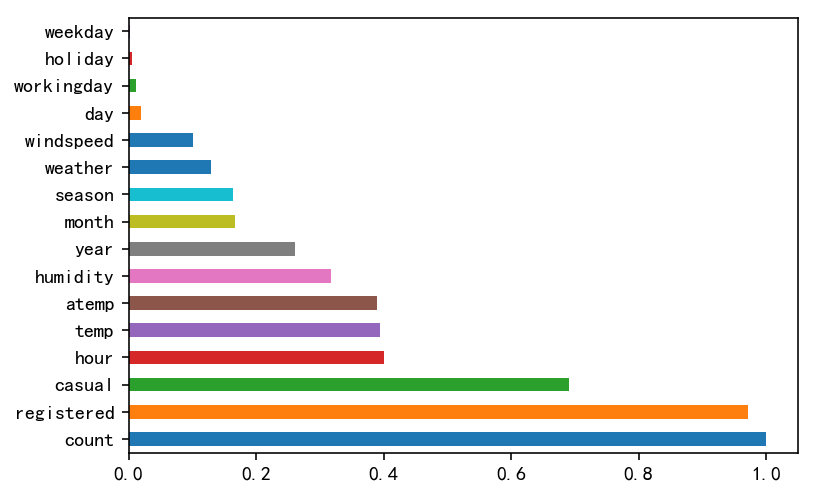

In [113]:
import matplotlib.pyplot as plt

influence_order_abs.plot(kind='barh')
plt.show()

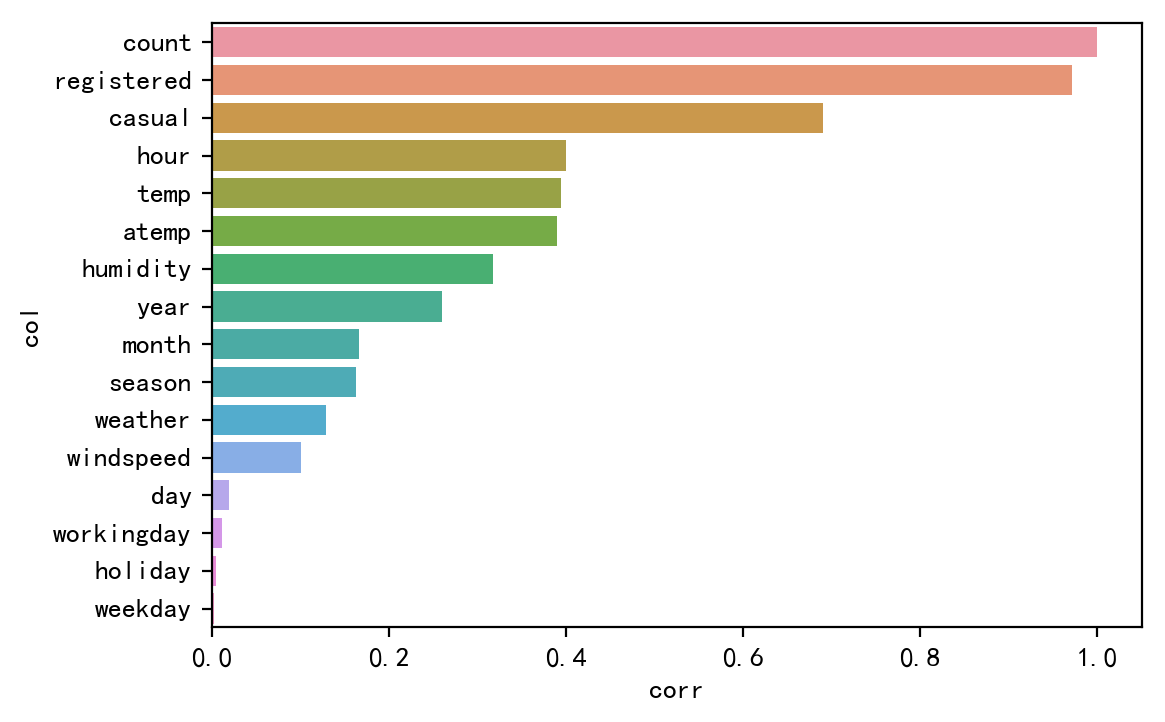

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)

# https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(
    y='col',
    x='corr',
    data=pd.DataFrame({
        'col': influence_order_abs.index,
        'corr': influence_order_abs.values
    }),
    orient='h',
    ax=ax)
plt.show()

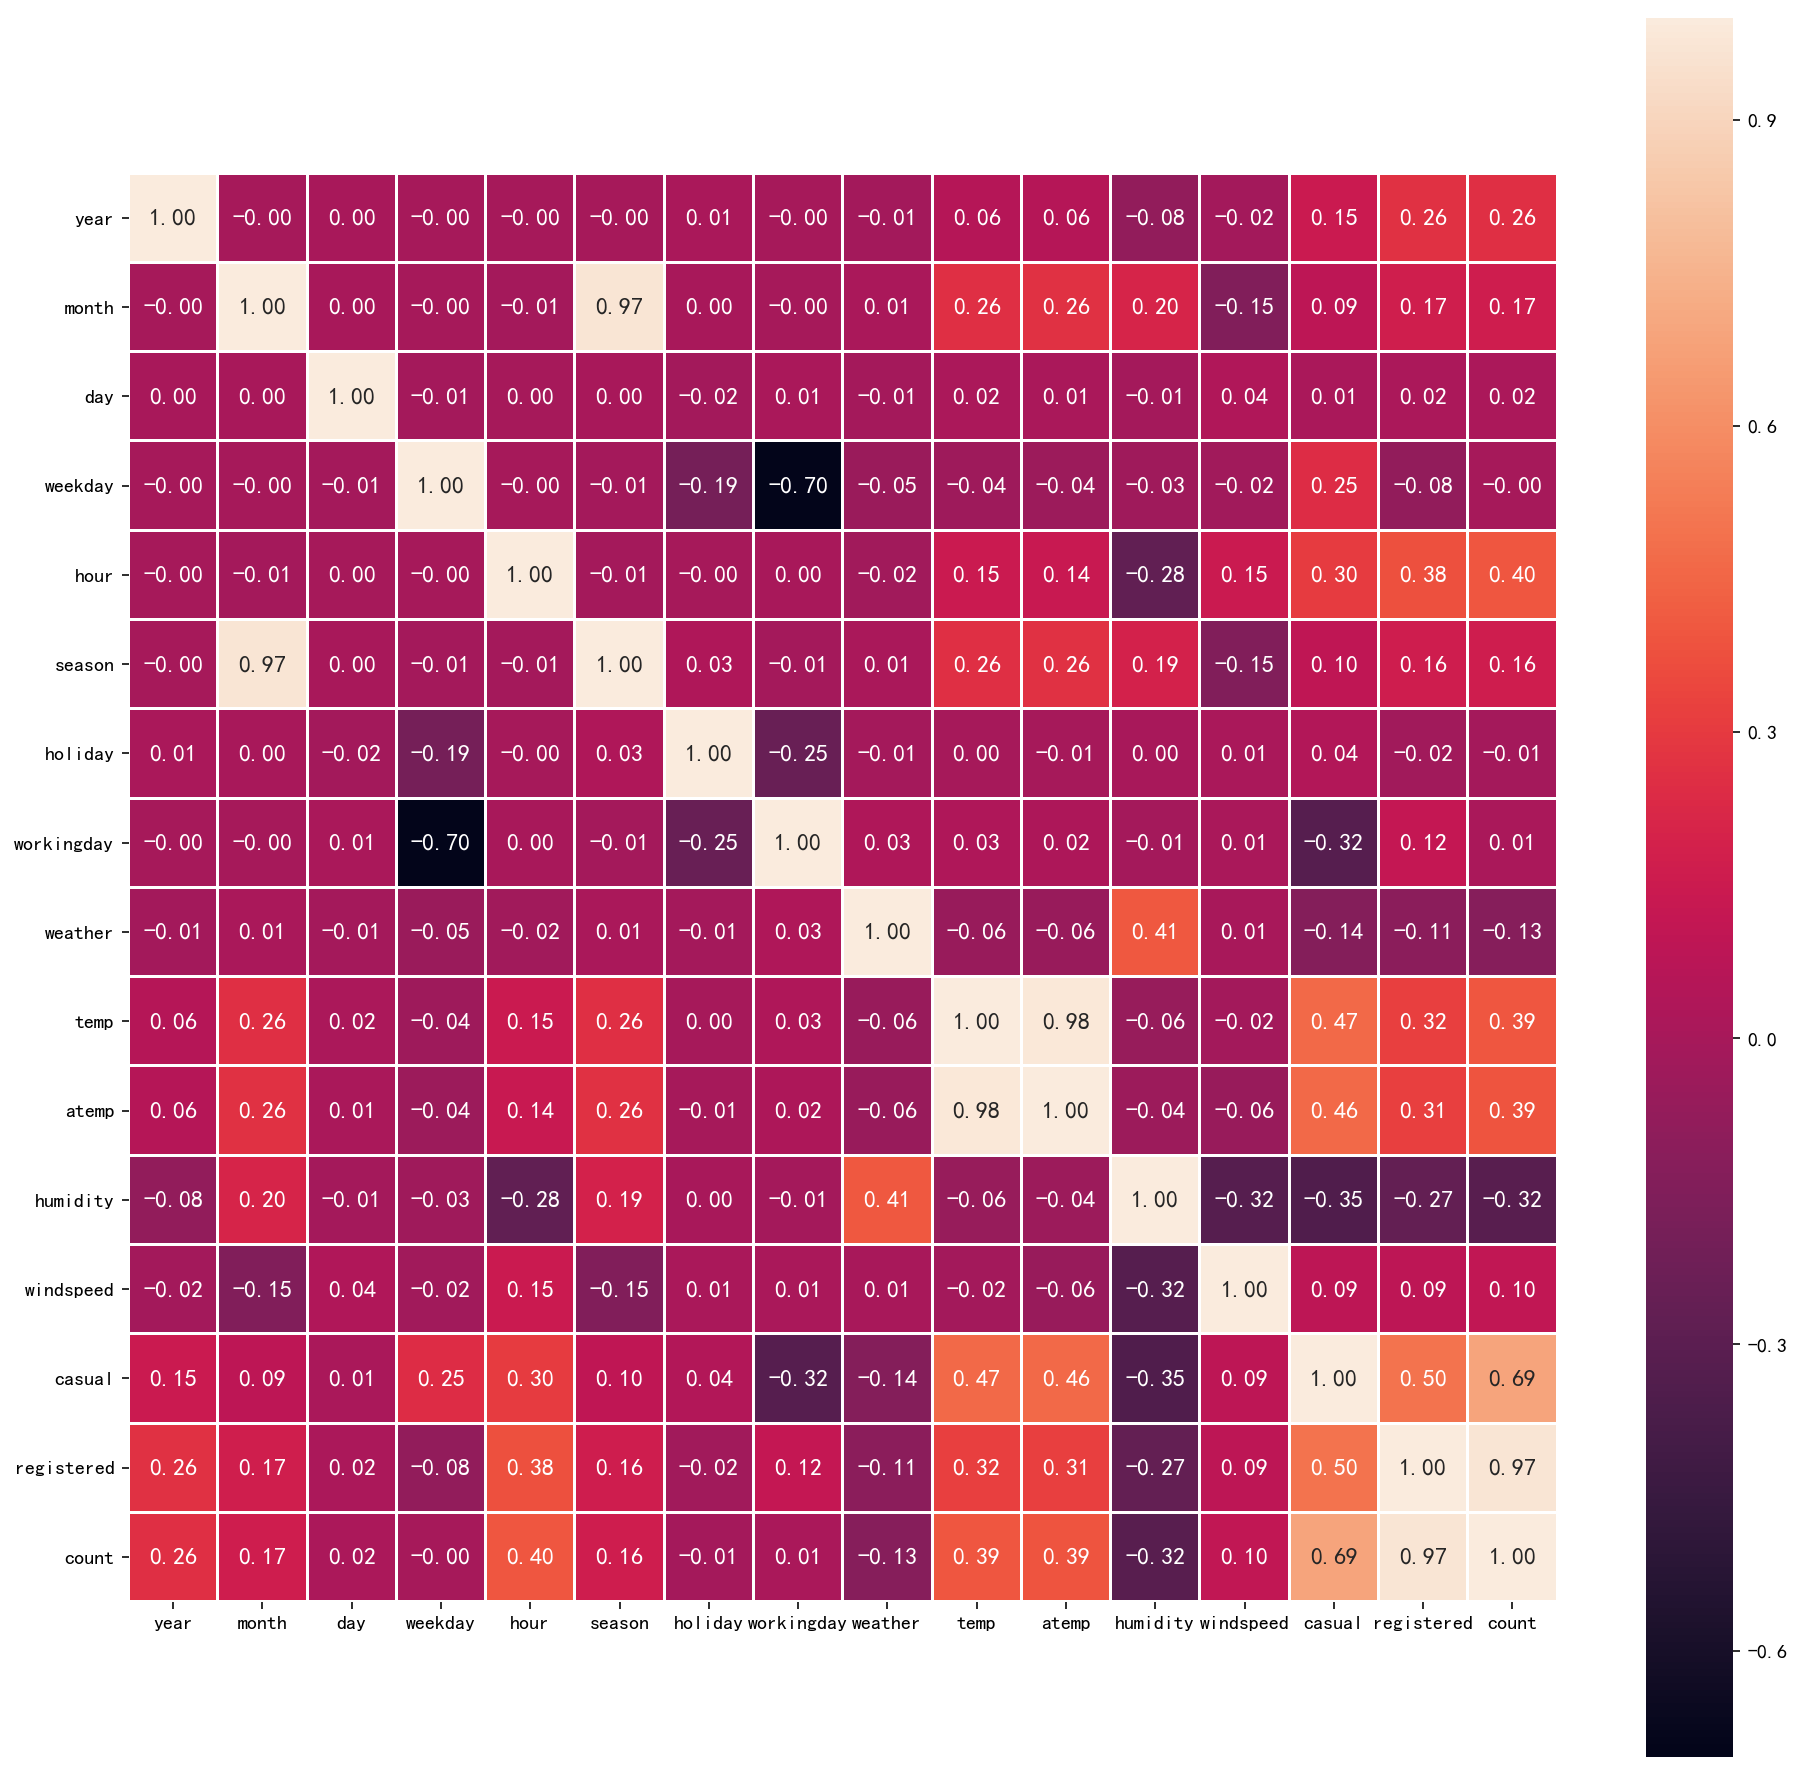

In [137]:
# 2、作相关性分析的热力图

f, ax = plt.subplots(figsize=(16, 16))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
# sns.heatmap(correlation, annot=True, center=1, cmap=cmap, linewidths=1, ax=ax)
sns.heatmap(
    correlation,
    vmax=1,
    square=True,
    annot=True,
    linewidths=1,
    fmt=".2f",
    annot_kws={
        'fontsize': 12
    })
plt.show()

可以看出不同的特征对于最终的变量 `count` 的影响不同。先别急，我们做一些探索性数据分析。

### year 对 count 的影响

In [145]:
# year 是离散型变量，把 count 连续型变量分类
train['year'].unique()

array([2011, 2012])

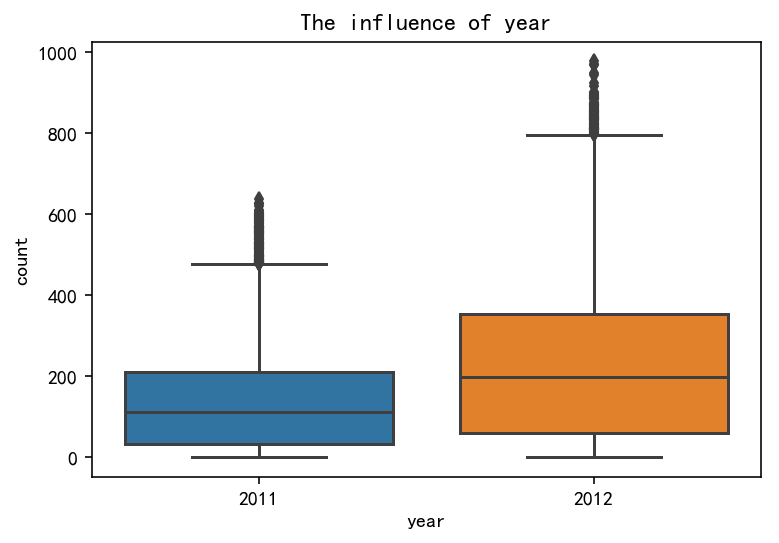

In [146]:
# sns.boxplot(x=train['year'], y=train['count'])
sns.boxplot(x='year', y='count', data=train)
plt.title('The influence of year')  # influence 影响
plt.show()

2012 年的租借数明显比 2011 年高，说明随着时间的推移，共享单车逐渐被更多的人熟悉和认可，使用者越来越多。

### month 对 count 的影响

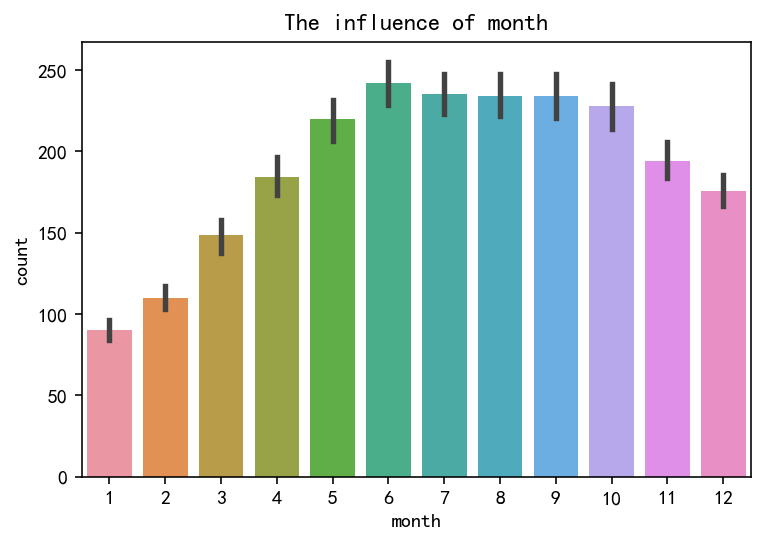

In [147]:
# 月份的影响
# barplot 默认求平均值，可以使用 train.groupby('month')['count'].mean() 验证
# 这种写法其实是语法糖，我更习惯的一种写法，month 是离散型变量，count 是连续变量
sns.barplot(x='month', y='count', data=train)
plt.title("The influence of month")
plt.show()

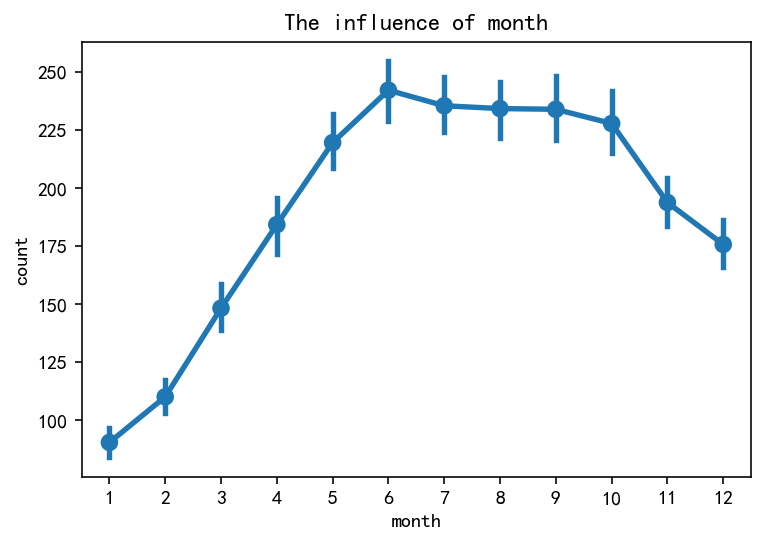

In [149]:
# 月份的影响，pointplot 图计算的也是每一个月份的平均值
# 也可以使用 pandas 提供的绘图功能直接绘图 train.groupby('month')['count'].mean().plot()
sns.pointplot(x='month', y='count', data=train)
plt.title("The influence of month")
plt.show()

In [150]:
train.groupby('month')['count'].mean()

month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64

### 季节对 count 的影响

In [152]:
train['season'].unique()

array([1, 2, 3, 4])

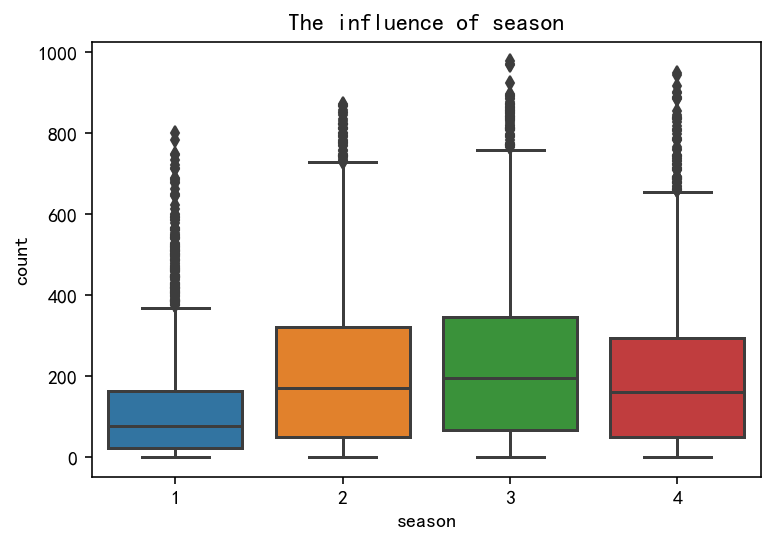

In [154]:
sns.boxplot(x='season', y='count', data=train)
plt.title("The influence of season")
plt.show()

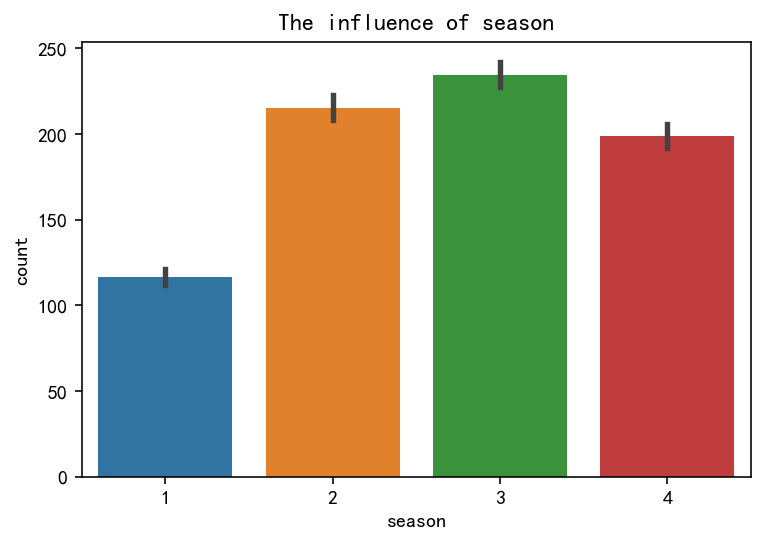

In [155]:
sns.barplot(x='season', y='count', data=train)
plt.title("The influence of season")
plt.show()

### 小时对 count 的影响

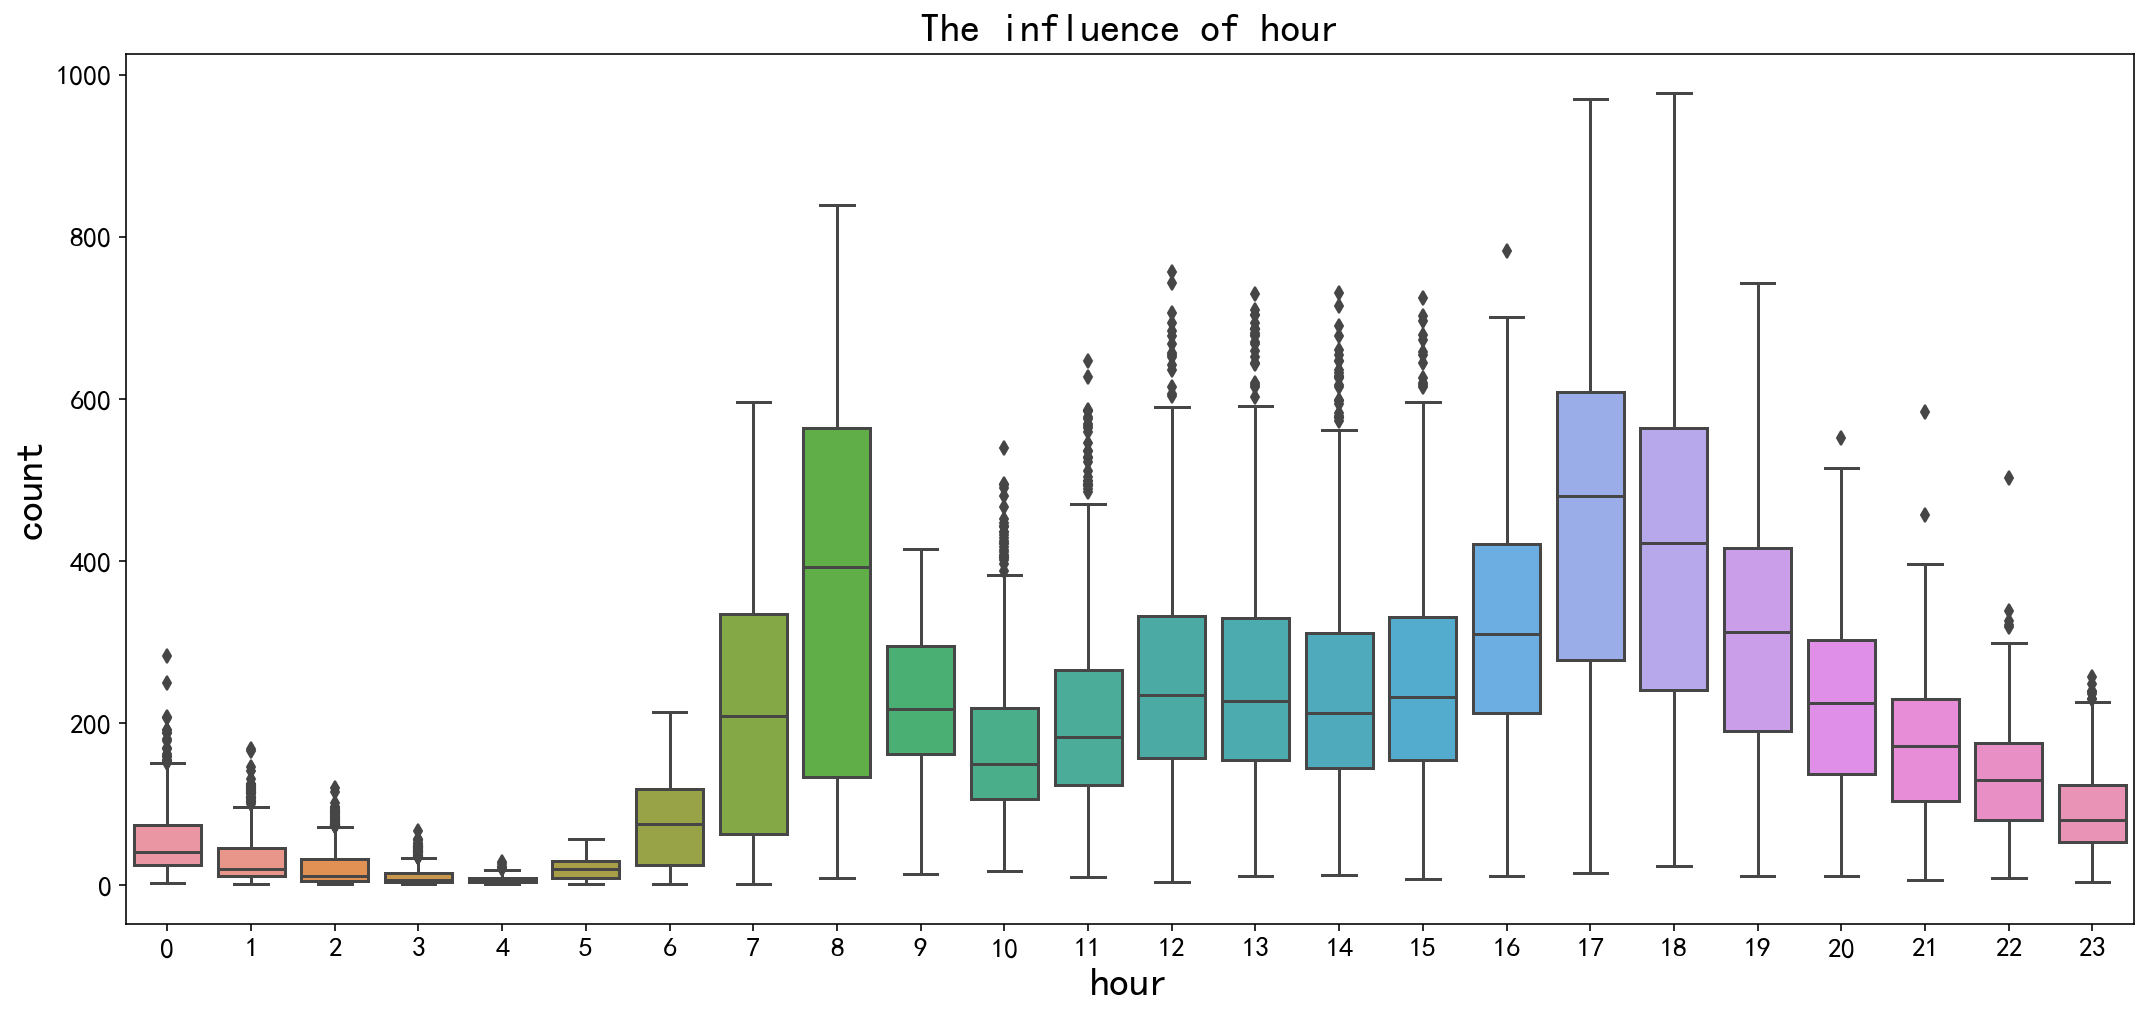

In [170]:
# train.groupby('hour')['count'].mean()
# train.groupby('hour')['count'].mean().plot(kind='bar')
plt.figure(figsize=(18, 8))
sns.boxplot(x='hour', y='count', data=train)
plt.title("The influence of hour", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('hour', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.show()

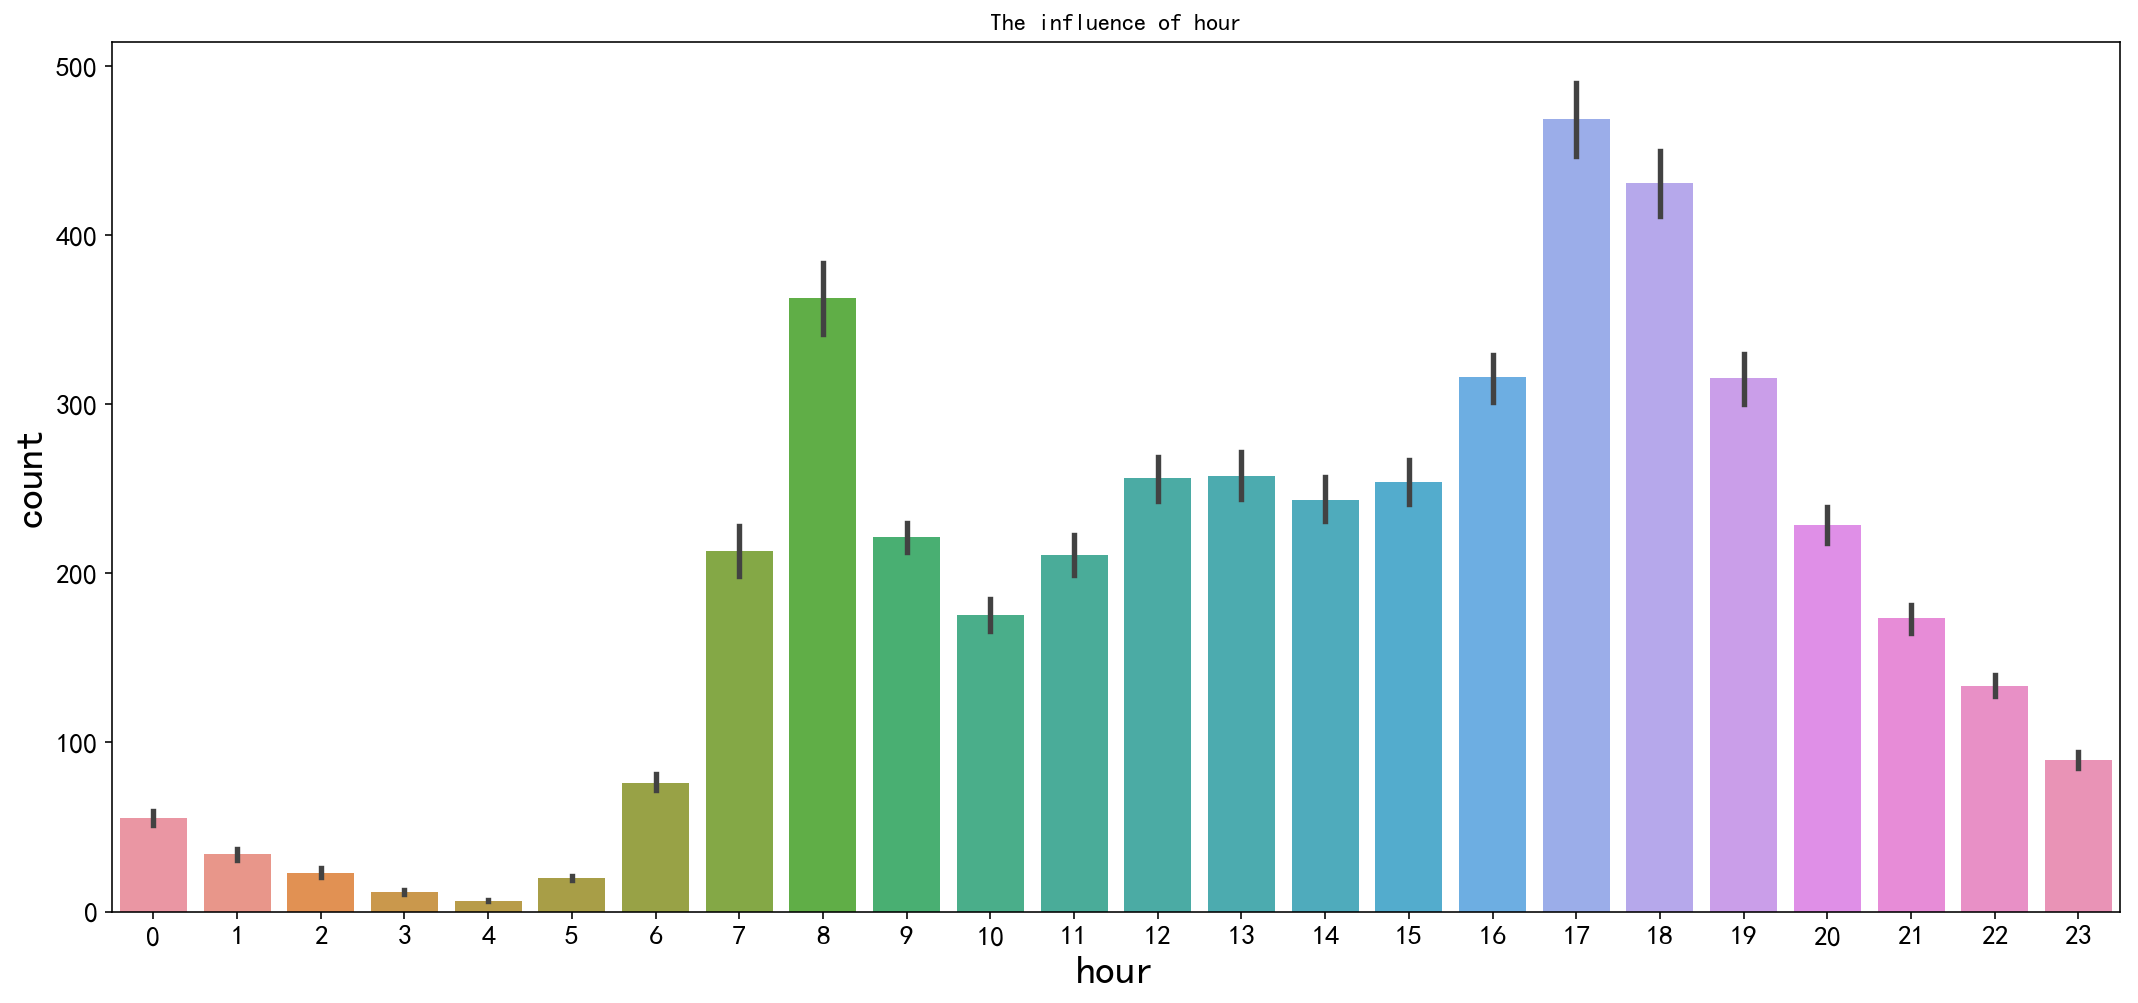

In [171]:
# 画成直方图，计算的是平均值
plt.figure(figsize=(18, 8))
sns.barplot(x='hour', y='count', data=train)
plt.title("The influence of hour")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('hour', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.show()

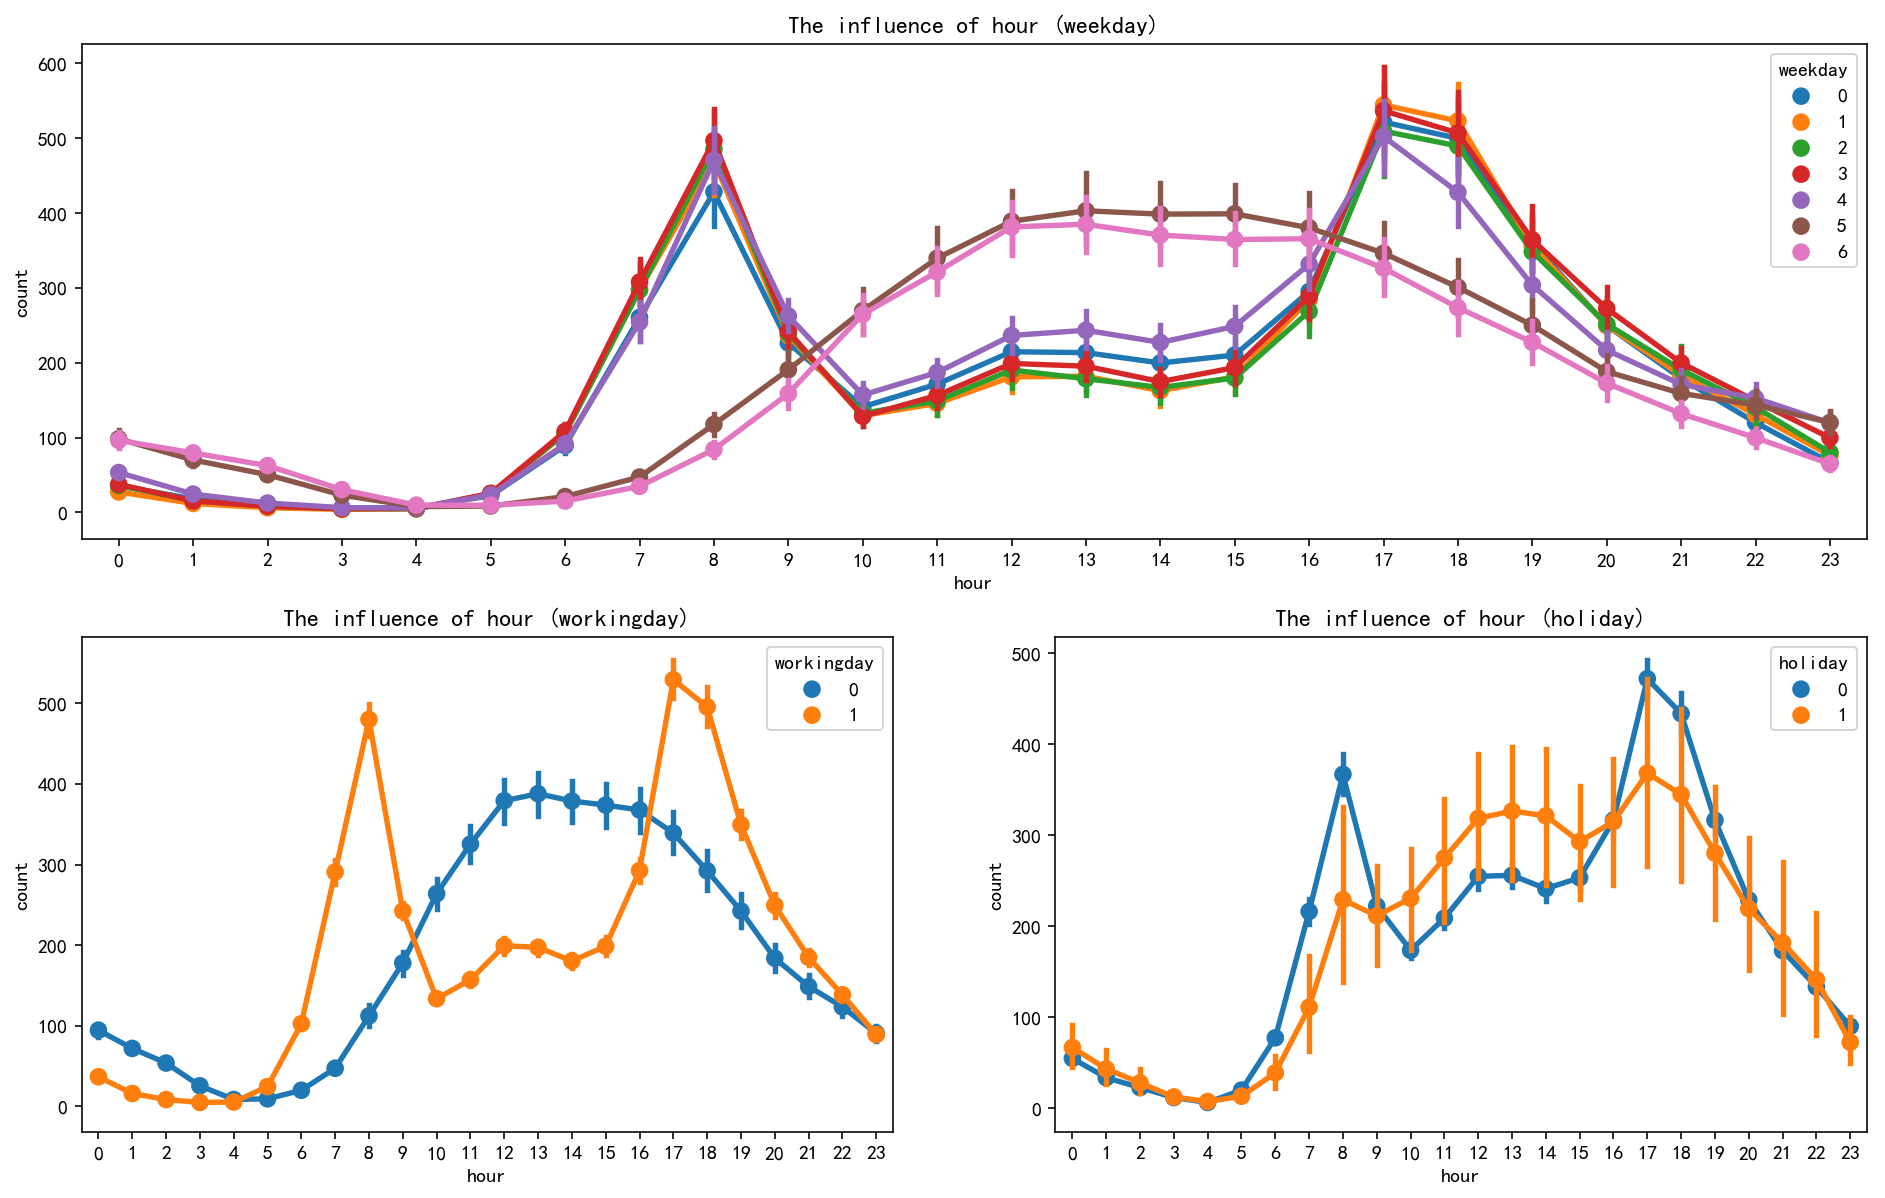

In [183]:
plt.subplots(2, 2, figsize=(16, 10))

ax1 = plt.subplot(211)
sns.pointplot(x='hour', y='count', hue='weekday', data=train, ax=ax1)
ax1.set_title('The influence of hour (weekday)')
# 可以看出，周末与平时不同

ax2 = plt.subplot(223)
sns.pointplot(x='hour', y='count', hue='workingday', data=train, ax=ax2)
ax2.set_title('The influence of hour (workingday)')

ax3 = plt.subplot(224)
sns.pointplot(x='hour', y='count', hue='holiday', data=train, ax=ax3)
ax3.set_title('The influence of hour (holiday)')

plt.show()

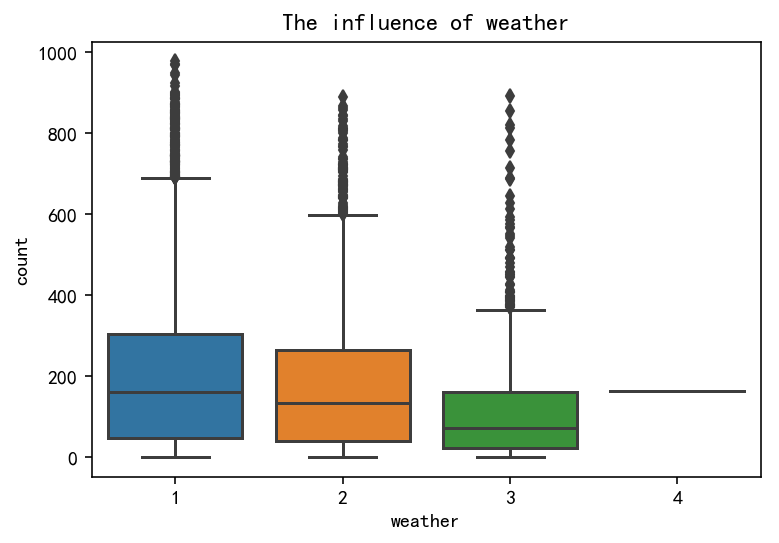

In [185]:
# 天气对租借数的影响
sns.boxplot(x='weather', y='count', data=train)
plt.title('The influence of weather')
plt.show()

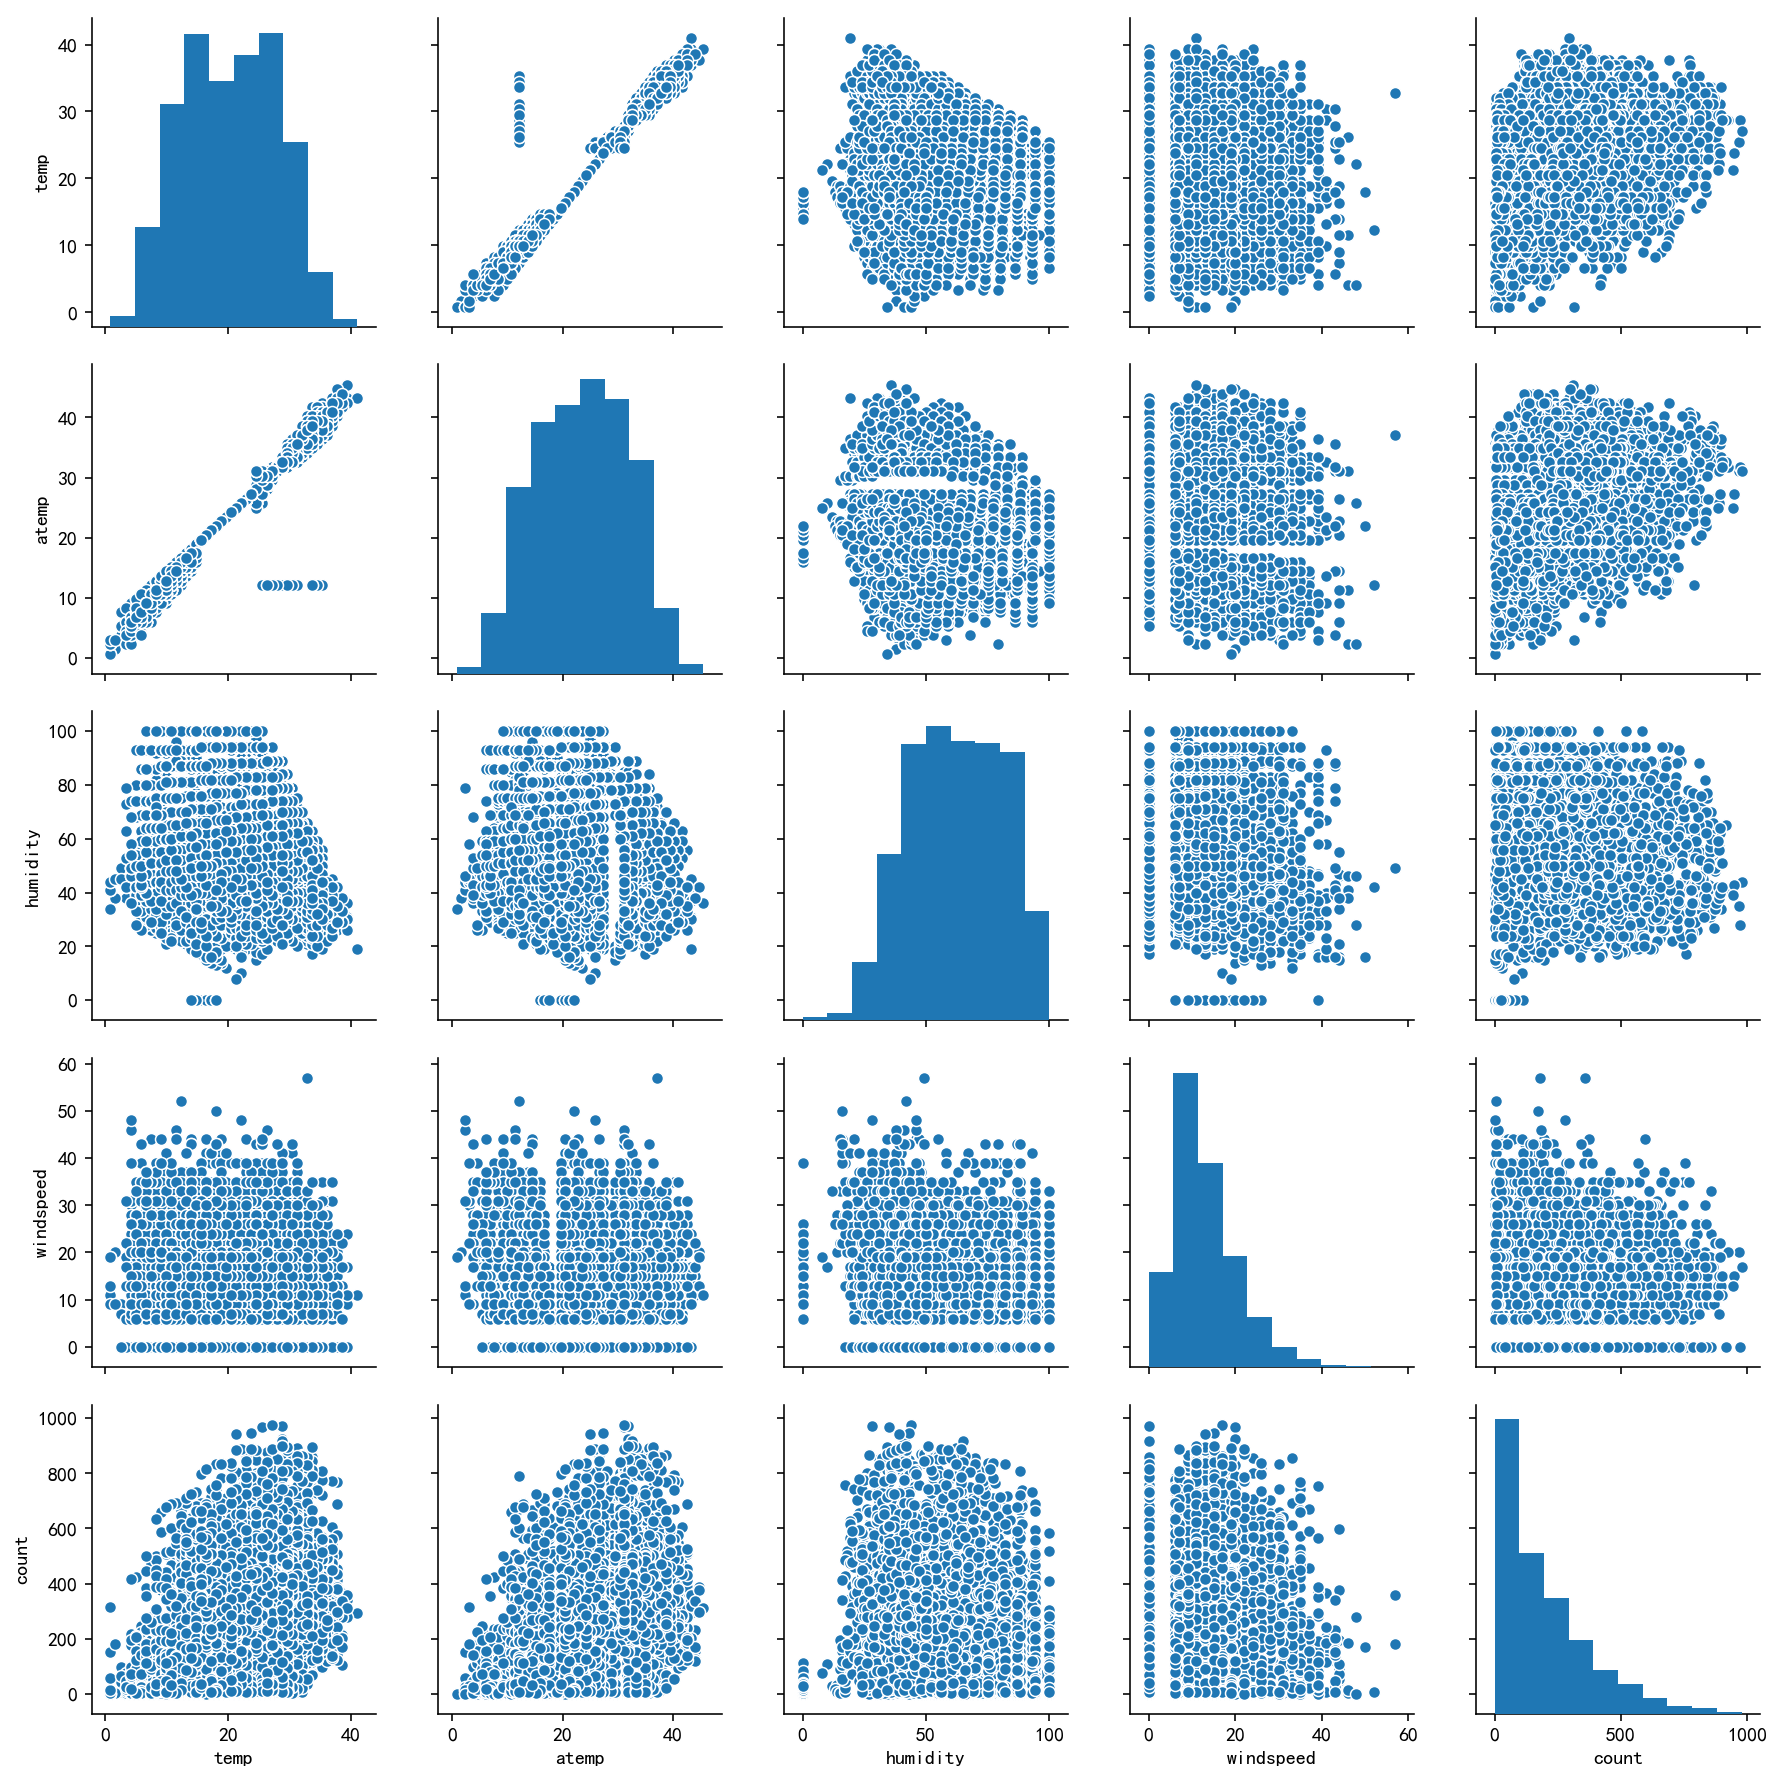

In [186]:
# 温度、湿度 humidity 、风速 windspeed 的影响
cols = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
sns.pairplot(train[cols])
plt.show()

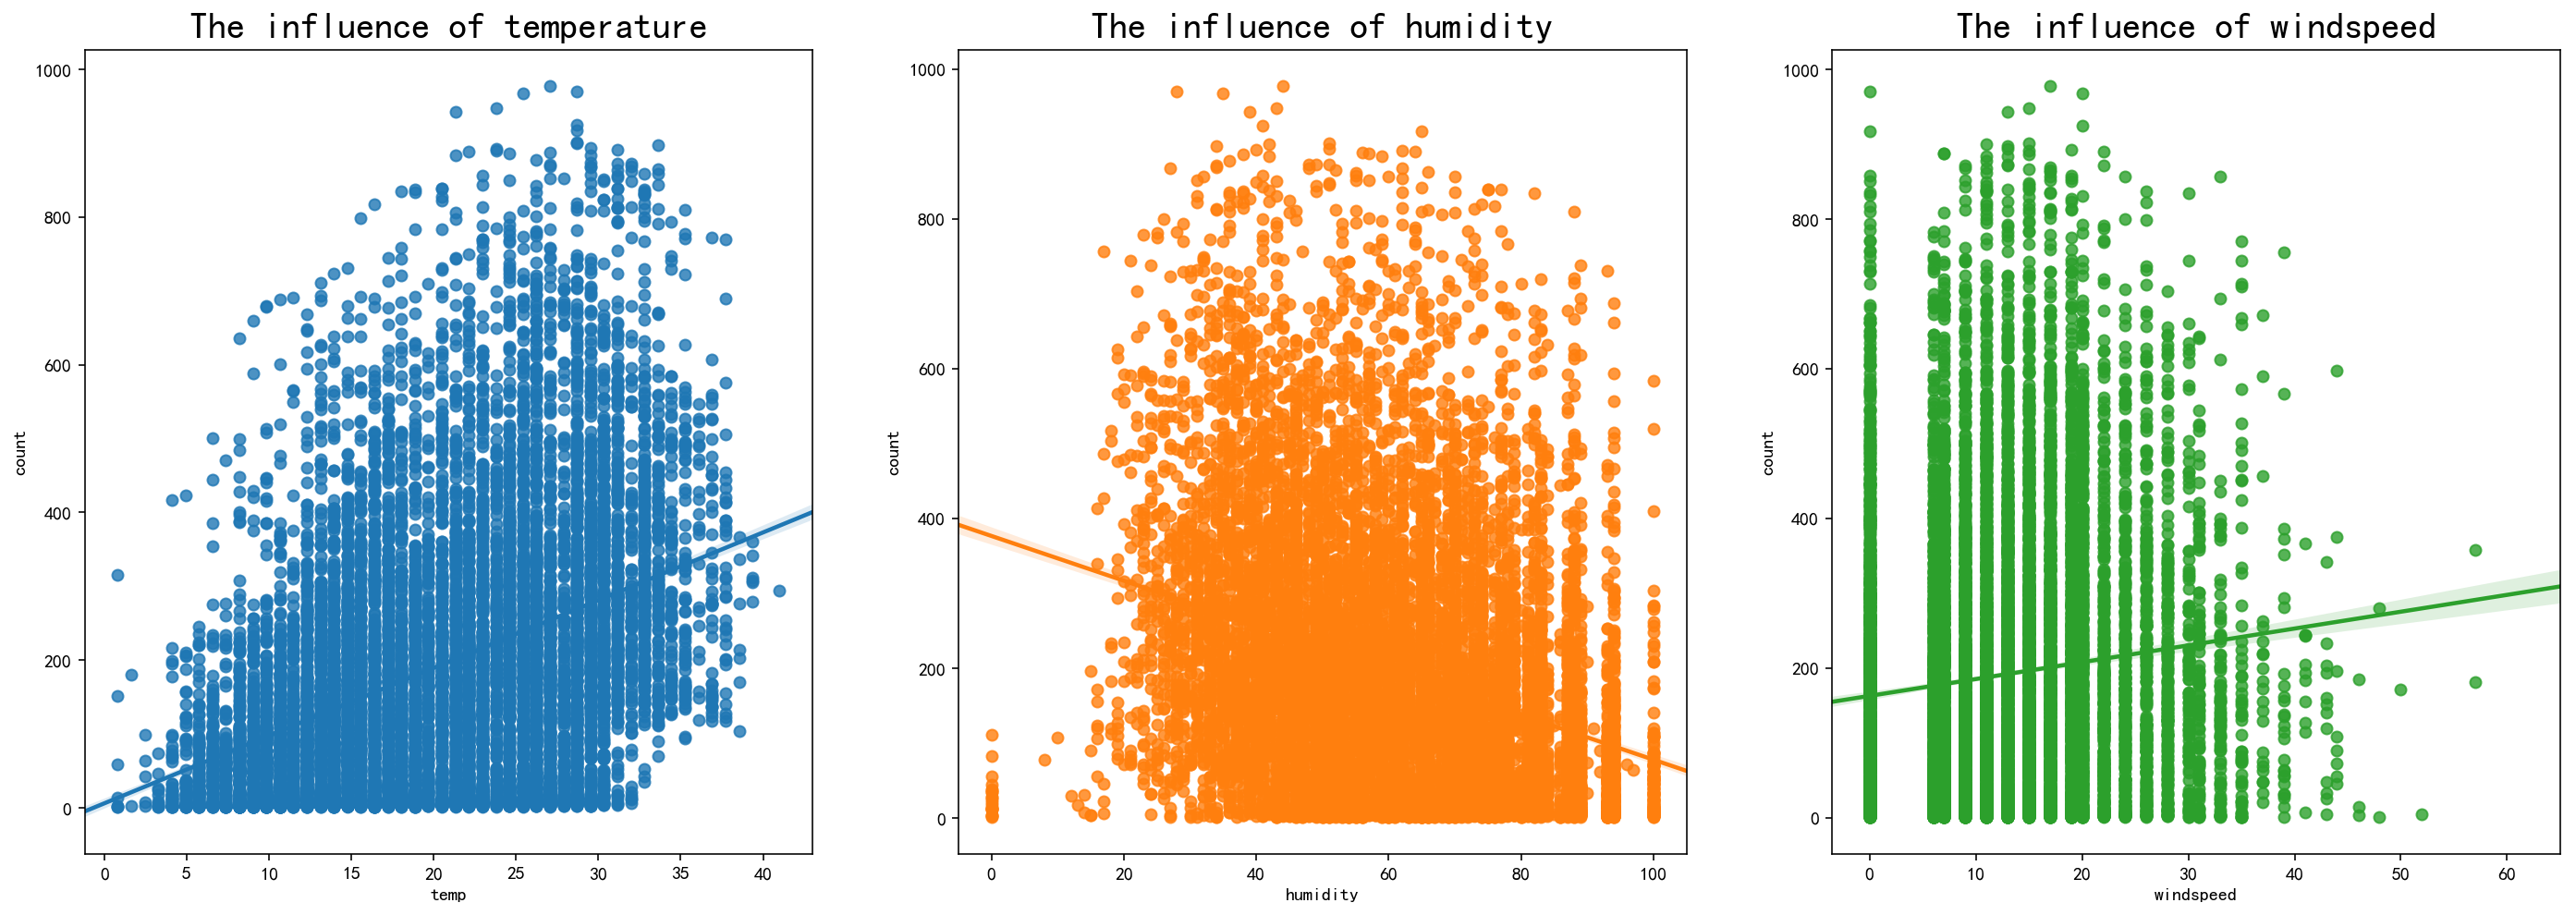

In [189]:
plt.subplots(1, 3, figsize=(24, 8))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

sns.regplot(train['temp'], train['count'], ax=ax1)
sns.regplot(train['humidity'], train['count'], ax=ax2)
sns.regplot(train['windspeed'], train['count'], ax=ax3)

ax1.set_title('The influence of temperature', fontsize=20)
ax2.set_title('The influence of humidity', fontsize=20)
ax3.set_title('The influence of windspeed', fontsize=20)
plt.show()

虽然三种天气因素对租借数的影响比较分散，但可以明显看出温度和风速与租借数成正相关，湿度与租借数成负相关。

## 特征工程

1. 删除不用的变量
2. 把离散型变量做独热编码



In [191]:
drop_feature = [
    'day', 'weekday', 'season', 'atemp', 'casual', 'registered', 'count'
]

train[drop_feature].head()

,day,weekday,season,atemp,casual,registered,count
0,1,5,1,14.395,3.0,13.0,16.0
1,1,5,1,13.635,8.0,32.0,40.0
2,1,5,1,13.635,5.0,27.0,32.0
3,1,5,1,14.395,3.0,10.0,13.0
4,1,5,1,14.395,0.0,1.0,1.0


In [204]:
# 删除不要的变量
data_train = train.drop(drop_feature, axis=1)
# 所选取的特征：year、month、hour、workingday、holiday、weather、temp、humidity 和 windspeed
data_train.head()

In [206]:
#显示所有列
pd.set_option('display.max_columns', None)

In [207]:
# 离散型变量（year、month、hour、weather）转换

column_trans = ['year', 'month', 'hour', 'weather']
data_train = pd.get_dummies(data_train, columns=column_trans)
data_train.head()

,holiday,workingday,temp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,81,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,9.02,80,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,9.02,80,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,9.84,75,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,9.84,75,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## 对测试数据集使用同样的方式处理

In [210]:
data_test = test.drop(drop_feature, axis=1)
data_test = pd.get_dummies(data_test, columns=column_trans)

## 训练出一个基模型

In [212]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(data_train, train_data['count'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [213]:
y_pred = rfr.predict(data_test)

In [214]:
result = pd.DataFrame({'datetime': test_data['datetime'], 'count': y_pred})
result 

,datetime,count
0,2011-01-20 00:00:00,16.130000
1,2011-01-20 01:00:00,8.940000
2,2011-01-20 02:00:00,6.960000
3,2011-01-20 03:00:00,7.610000
4,2011-01-20 04:00:00,4.950000
5,2011-01-20 05:00:00,8.650000
6,2011-01-20 06:00:00,36.170000
7,2011-01-20 07:00:00,92.640000
8,2011-01-20 08:00:00,246.730000
9,2011-01-20 09:00:00,120.050000


In [215]:
# 得分：0.59098
result.to_csv('../output/rfr_result.csv', index=None)

## 模型训练

In [221]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_train, train_data['count'], test_size=0.33, random_state=42)

In [222]:


from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_log_error

In [229]:
import sklearn

sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

## RandomForestRegressor

In [230]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)
rfr_socres = cross_val_score(
    rfr, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_log_error')

rfr_socres_mean = (-rfr_socres).mean()

In [231]:
rfr_socres_mean

0.2722701664245762

In [233]:
from sklearn.metrics import mean_squared_log_error

rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)
np.sqrt(mean_squared_log_error(y_test, rfr.predict(X_test)))

0.4843251893782275

## ExtraTreesRegressor

In [234]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=100)
etr_socres = cross_val_score(
    etr, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_log_error')

etr_socres_mean = (-etr_socres).mean()

In [235]:
etr_socres_mean

0.18438654991667988

In [236]:
etr = ExtraTreesRegressor(n_estimators=100)
etr.fit(X_train, y_train)
np.sqrt(mean_squared_log_error(y_test, etr.predict(X_test)))

0.4140949437424332